# Session 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

## Matplotlib (cont.)

In [10]:
x = np.arange(0, 1000) # 100000
y = np.random.randint(0, 100, size=1000)
z = 10*np.random.randn(1000)+50

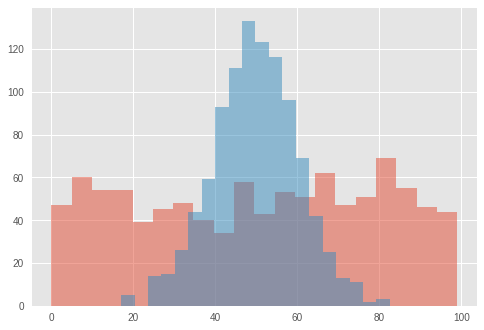

In [6]:
plt.style.use("ggplot") # seaborn
a = plt.hist(y, bins=20, alpha=0.5)
plt.hist(z, bins=20, alpha=0.5)
plt.show()

In [7]:
print("frequencies: {}".format(a[0]))
print("bins start point: {}".format(a[1]))


frequencies: [47. 60. 54. 54. 39. 45. 48. 40. 34. 58. 43. 53. 51. 62. 47. 51. 69. 55.
 46. 44.]
bins start point: [ 0.    4.95  9.9  14.85 19.8  24.75 29.7  34.65 39.6  44.55 49.5  54.45
 59.4  64.35 69.3  74.25 79.2  84.15 89.1  94.05 99.  ]


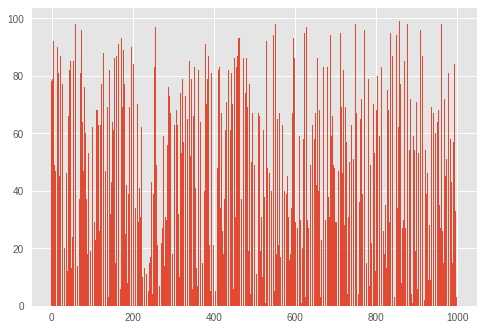

In [8]:
plt.bar(x, y)
plt.show()

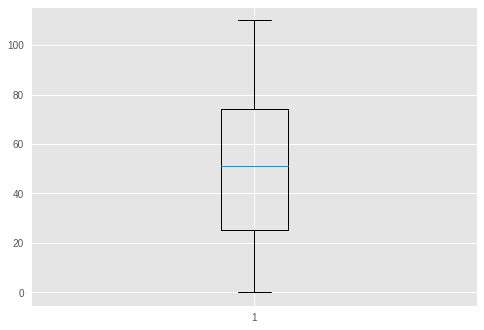

In [11]:
y = y.tolist()
y.append(250)
plt.boxplot(y)
plt.show()

detect anomalies

In [12]:
max_x, min_x = 10, -10
mu = 0
sigma = 0.7

x = np.linspace(min_x, max_x, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
y_c = stats.norm.cdf(x, loc=mu, scale=sigma)

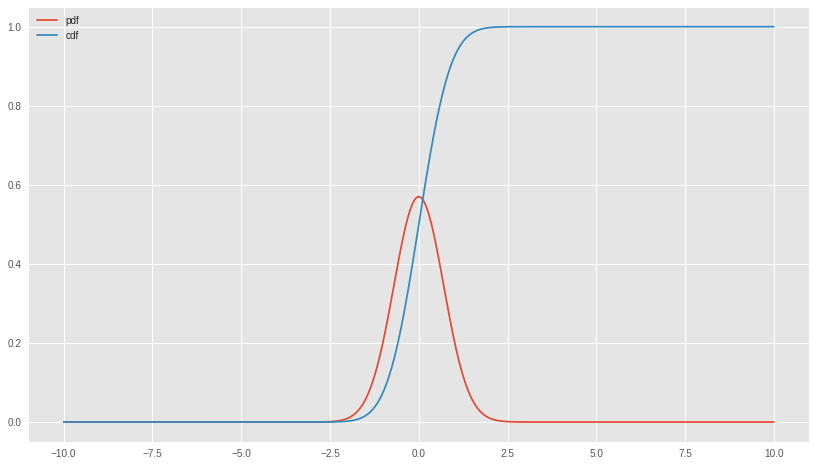

In [13]:
plt.figure(figsize=(14, 8))
plt.plot(x, y)
plt.plot(x, y_c)

plt.legend(["pdf", "cdf"], loc=2)
plt.show()

## Pandas

In [14]:
import pandas as pd

In [16]:
df = pd.read_csv("./data/titanic_train.csv")
df = df.set_index("PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.loc[4] # index

Survived                                               1
Pclass                                                 1
Name        Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                               female
Age                                                   35
SibSp                                                  1
Parch                                                  0
Ticket                                            113803
Fare                                                53.1
Cabin                                               C123
Embarked                                               S
Name: 4, dtype: object

In [18]:
df.iloc[3][2] # position

'Futrelle, Mrs. Jacques Heath (Lily May Peel)'

In [19]:
df.Age > 80

PassengerId
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
       ...  
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [20]:
df[df.Age>=70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [22]:
df = pd.read_csv("./data/titanic_train.csv", index_col="PassengerId")
# df = df.reset_index()
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [25]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [26]:
df.isnull().sum().sum()

866

In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [28]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
df = df.drop(['Ticket'], axis=1)

In [30]:
age_mean = df['Age'].mean()
print(age_mean)

29.69911764705882


In [31]:
embark_mode = (df["Embarked"].mode().values[0])
print(embark_mode)

S


In [32]:
df['Age'] = df['Age'].fillna(age_mean)
df['Embarked'] = df['Embarked'].fillna(embark_mode)
df['Cabin'] = df['Cabin'].fillna("U")

In [33]:
print(type(df[["Age"]]))
print(type(df["Age"]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [34]:
pd.get_dummies(df["Sex"], prefix="sex")

,sex_female,sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,0,1
8,0,1
9,1,0


In [35]:
TITLE_LIST = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms',
              'Mlle', 'Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer']


def substring_exist(string, substrings):
    for substring in substrings:
        if str.find(string, substring) != -1:
            return substring
    print(string)
    return np.nan

def replace_titles(x):
    title = x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        # return 'Mr'
        return 0
    elif title in ['Countess', 'Mme']:
        # return 'Mrs'
        return 0.75
    elif title in ['Mlle', 'Ms']:
        # return 'Miss'
        return 1
    elif title == 'Dr':
        if x['Sex'] == 'Male':
            # return 'Mr'
            return 0
        else:
            # return 'Mrs'
            return 0.75
    else:
        # return title
        return 0.5


In [36]:
df['Title'] = df['Name'].map(
    lambda x: substring_exist(x, TITLE_LIST))

In [37]:
CABIN_LIST = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'U']
def replace_deck(x):
    deck = x['Deck']
    if deck == "U":
        return 0
    elif deck == "G":
        return 0.15
    elif deck == "F":
        return 0.3
    elif deck == "E":
        return 0.45
    elif deck == "D":
        return 0.6
    elif deck == "C":
        return 0.75
    elif deck == "B":
        return 0.9
    elif deck == "A":
        return 1.1
    elif deck == "T":
        return 1.2
    else:
        return -1

In [38]:
def replace_embark(x):
    embarked = x['Embarked']
    if embarked == "S":
        return 0
    elif embarked == "Q":
        return 1
    else:
        return -1

In [39]:
df['Title'] = df.apply(replace_titles, axis=1)
df['Embarked'] = df.apply(replace_embark, axis=1)
df['Deck'] = df['Cabin'].map(lambda x: substring_exist(x, CABIN_LIST))
df['Deck'] = df.apply(replace_deck, axis=1)


In [40]:
df['Family_Size'] = df['SibSp']+df['Parch']

In [41]:
df['Fare_Per_Person'] = df['Fare']/(df['Family_Size']+1)

In [42]:
def replace_sex(x):
    sex = x['Sex']
    if sex == "male":
        return 0
    else:
        return 1

In [43]:
df['Sex'] = df.apply(replace_sex, axis=1)

In [44]:
df["Pclass_inv"] = df["Pclass"].map(lambda x: 1/x)

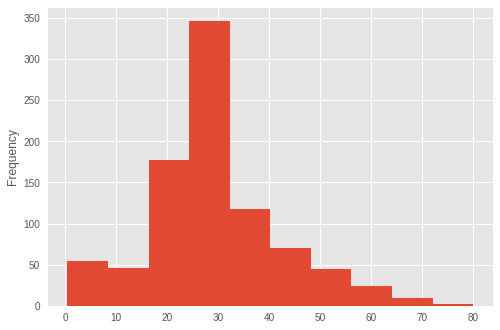

In [45]:
df["Age"].plot(kind="hist")


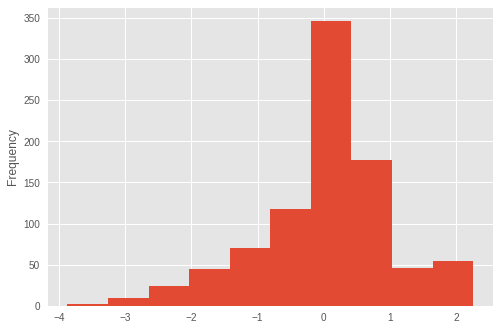

In [46]:
std_dev = np.std(df["Age"])
df["Age_norm"] = -(df.Age - age_mean)/std_dev

df.Age_norm.plot(kind="hist")


In [47]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Deck,Family_Size,Fare_Per_Person,Pclass_inv,Age_norm
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,U,0,0.5,0.00,1,3.62500,0.333333,0.592481
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,-1,0.5,0.75,1,35.64165,1.000000,-0.638789
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,U,0,0.5,0.00,0,7.92500,0.333333,0.284663
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,0,0.5,0.75,1,26.55000,1.000000,-0.407926
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,U,0,0.5,0.00,0,8.05000,0.333333,-0.407926


In [48]:
df = df.drop("Name", axis=1)

In [49]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Deck,Family_Size,Fare_Per_Person,Pclass_inv,Age_norm
PassengerId,,,,,,,,,,,,,,,
887,0,2,0,27.000000,0,0,13.00,U,0,0.0,0.00,0,13.0000,0.500000,0.207709
888,1,1,1,19.000000,0,0,30.00,B42,0,0.5,0.90,0,30.0000,1.000000,0.823344
889,0,3,1,29.699118,1,2,23.45,U,0,0.5,0.00,3,5.8625,0.333333,-0.000000
890,1,1,0,26.000000,0,0,30.00,C148,-1,0.5,0.75,0,30.0000,1.000000,0.284663
891,0,3,0,32.000000,0,0,7.75,U,1,0.5,0.00,0,7.7500,0.333333,-0.177063


In [50]:
df.sort_values(by="Age", ascending=False, na_position="first")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Deck,Family_Size,Fare_Per_Person,Pclass_inv,Age_norm
PassengerId,,,,,,,,,,,,,,,
631,1,1,0,80.00,0,0,30.0000,A23,0,0.5,1.10,0,30.000000,1.000000,-3.870872
852,0,3,0,74.00,0,0,7.7750,U,0,0.5,0.00,0,7.775000,0.333333,-3.409146
97,0,1,0,71.00,0,0,34.6542,A5,-1,0.5,1.10,0,34.654200,1.000000,-3.178283
494,0,1,0,71.00,0,0,49.5042,U,-1,0.5,0.00,0,49.504200,1.000000,-3.178283
117,0,3,0,70.50,0,0,7.7500,U,1,0.5,0.00,0,7.750000,0.333333,-3.139805
673,0,2,0,70.00,0,0,10.5000,U,0,0.5,0.00,0,10.500000,0.500000,-3.101328
746,0,1,0,70.00,1,1,71.0000,B22,0,0.0,0.90,2,23.666667,1.000000,-3.101328
34,0,2,0,66.00,0,0,10.5000,U,0,0.5,0.00,0,10.500000,0.500000,-2.793511
457,0,1,0,65.00,0,0,26.5500,E38,0,0.5,0.45,0,26.550000,1.000000,-2.716556


In [51]:
df.to_csv("./data/neat.csv")

In [ ]:
# merge